In [7]:
#=r=1.7
t=41
l=Int64((t-1)/2)
X = zeros(Float64,t,1)
for j in 1:t
    X[j,1] = 2r*rand()-r
end=#

In [8]:
#=data="/home/hoanganh/Desktop/math-topics/algebraic_statistics/codes/datasets/plot" # path of data
output_file = open(data*"/univariate_regression2_data.jl","w")

write(output_file, "r = $(r)")
write(output_file, "; \n \n")
write(output_file, "t = $(t)")
write(output_file, "; \n \n")
write(output_file, "X = ")
show(output_file, X)

close(output_file)=#

In [1]:
data="/home/hoanganh/Desktop/math-topics/algebraic_statistics/codes/datasets/plot" # path of data
include(data*"/univariate_regression2_data.jl");

In [2]:
func(a)=sin(a)+0.2*cos(5*a)#*(2*rand().-1)
# weight (kg)
phi = Vector{Float64}(func.(X[:,1]))

41-element Vector{Float64}:
  0.3968440275093697
 -0.7991617394979649
 -0.7392302458597966
 -0.02226943085363564
 -0.780931494728509
  1.094722234637983
 -0.7930608009883349
 -0.17466872135584252
  0.4543758950142435
  0.38511515747364133
  0.42357865043412435
 -1.048457776722172
 -0.8114355520652116
  ⋮
  0.3061586467861919
 -0.7554405461085787
  1.1406471467365613
  0.2940861476867604
 -0.7977231153823896
 -0.900478420700386
  0.8424790679868736
 -0.7947729363701831
  0.3085760178050995
  0.3105809190856736
  0.31043664979692664
  1.0802155402223586

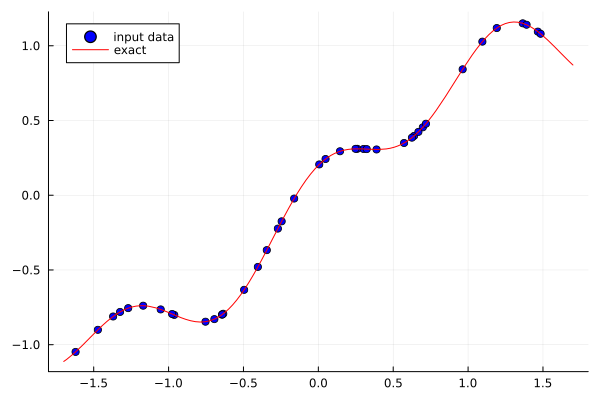

In [3]:
using Plots

#p_exact(z)=0.5
scatter(X[:,1], phi,label ="input data",color="Blue")#,aspect_ratio = 1)
plot!(func, -r, r, label ="exact",color="Red")

In [4]:
include("../src/RegressionModels.jl")
using .RegressionModels


n=1
c=Inf
k=3


eval_pol_approx=RegressionModels.model_pol_regress(n,X,t,c,k,phi,additional_monomials=false);

****Method based on polynomial regression****

number of attributes: n=1
sample sizes for traint sets: t=41
degree of separating polynomial: k=3
perturbed parameter: c=Inf
Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 0               
  Affine conic cons.     : 1               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 5               
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Eliminator started.
Freed constraints in eliminator : 2
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 0                 time                   : 0.00            
Lin. dep.  - number                 : 0          

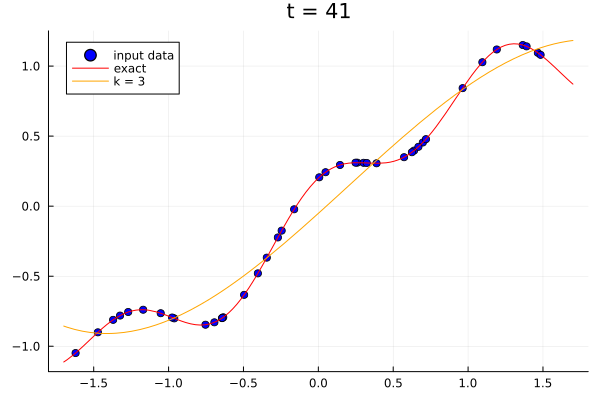

In [5]:
p_approx(z)=eval_pol_approx([z;zeros(n-1)])
plot!(p_approx, -1.7, 1.7, label = "k = $(k)",#=legend=:bottomright,=#title = "t = $(t)",color="Orange")

In [6]:
include("../src/RegressionModels.jl")
using .RegressionModels


n=1
c=Inf
k=8


eval_pol_approx=RegressionModels.model_pol_regress(n,X,t,c,k,phi,additional_monomials=false);

****Method based on polynomial regression****

number of attributes: n=1
sample sizes for traint sets: t=41
degree of separating polynomial: k=8
perturbed parameter: c=Inf
Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 0               
  Affine conic cons.     : 1               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 10              
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 7
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time              

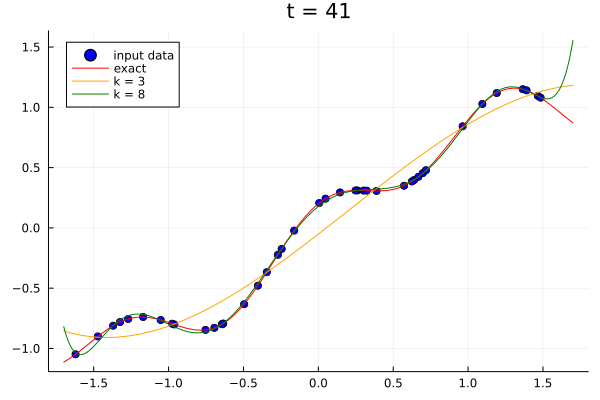

In [7]:
p_approx2(z)=eval_pol_approx([z;zeros(n-1)])
plot!(p_approx2, -1.7, 1.7, label = "k = $(k)",color="Green")

In [15]:
#savefig("/home/hoanganh/Desktop/math-topics/Polynomial_Regression/drafts/univariate_regression_numsamp$(t).png")

"/home/hoanganh/Desktop/math-topics/Polynomial_Regression/drafts/univariate_regression_numsamp41.png"